# Via Sampling

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Definicion de funciones

* Downsampling: Reduce en un factor $m$ el tamaño de la imagen
* Upsampling: Aumenta en un factor $m$ el tamaño de la imagen

In [ ]:
# Functions Definitions

def downsampling(img,m,filter = True):
  # Downsample the square image I by a factor of m
  N,M = img.shape
  # Aplicamos el filtro ideal

  w = 1/m
  F = np.fft.fftshift(np.fft.fft2(img))
  if filter == True:
    for i in range(1,N):
      for j in range(1,M):
        r2 = (i-np.round(N/2))**2 + (j-np.round(M/2))**2
        if r2 > np.round((N/2*w)**2):
          F[i][j] = 0

  img_down = np.real(np.fft.ifft2(np.fft.fftshift(F)))
  img_down = cv.resize(img_down, (M//m, N//m), interpolation = cv.INTER_NEAREST)
  return img_down


def upsampling(img,m):
  # Upsample the square image I by a factor of m
  N,M = img.shape
  img_up = np.zeros((m*N, m*M))
  # Expand input image
  img_up = cv.resize(img, (np.round(M*m), np.round(N*m)), interpolation = cv.INTER_NEAREST)
  
  # Filtro ideal
  N,M = img_up.shape
  w = 1/m
  F = np.fft.fftshift(np.fft.fft2(img_up))
  for i in range(1,N):
    for j in range(1,M):
      r2 = (i-np.round(N/2))**2 + (j-np.round(M/2))**2
      if r2 > np.round((N/2*w)**2):
        F[i][j] = 0

  img_up = (m*m)*np.abs(np.fft.ifft2(np.fft.fftshift(F)))
  return img_up


## Script Via Sampling

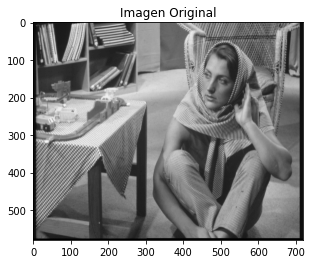

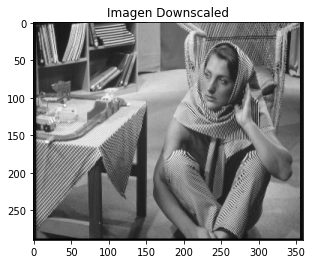

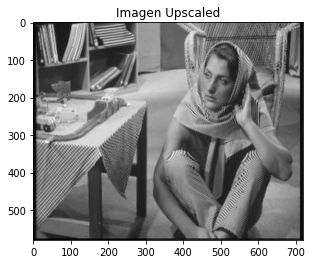

In [ ]:
#Via sampling theory
m=2;
img = plt.imread('/content/drive/Shareddrives/Imagenes/TP2 Grupo 2/Ejercicio 2/barbara.gif');
img = cv.cvtColor(img, cv.COLOR_BGRA2GRAY);

im_down = downsampling(img,m, filter= False)
im_up = upsampling(im_down,m)
plt.imshow(img, cmap= 'gray')
plt.title('Imagen Original')
plt.show()
plt.imshow(im_down, cmap= 'gray')
plt.title('Imagen Downscaled')
plt.show()
plt.imshow(im_up, cmap= 'gray')
plt.title('Imagen Upscaled')
plt.show()
